In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
from platform import python_version
print(python_version())

3.7.9


In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.3.0'

In [7]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('../VesQuant4ML_data/data_labelled.csv', header=None,
                    names=["t_time","t_angle","run_diff","vel_diff","class"])

In [9]:
data.head()

,t_time,t_angle,run_diff,vel_diff,class
0,0.46,37.186,155.370,0.18187,4
1,0.30,91.094,-88.100,-0.07524,2
2,0.70,156.370,99.360,0.01621,2
3,0.41,157.640,-127.320,-0.11604,3
4,0.56,67.791,0.385,0.22480,4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t_time    146 non-null    float64
 1   t_angle   146 non-null    float64
 2   run_diff  146 non-null    float64
 3   vel_diff  146 non-null    float64
 4   class     146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


In [11]:
data.describe()

,t_time,t_angle,run_diff,vel_diff,class
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.884589,86.657967,-3.488911,0.012235,2.732877
std,1.165460,49.191471,222.697225,0.424232,0.984648
min,0.010000,6.801400,-856.180000,-1.104500,1.000000
25%,0.282500,37.853250,-57.220500,-0.184642,2.000000
50%,0.505000,89.254000,0.055500,0.005940,3.000000
75%,1.070000,129.970000,68.881500,0.165242,4.000000
max,9.190000,168.620000,774.230000,2.121900,4.000000


In [12]:
data['class'].value_counts()

2    59
4    44
3    31
1    12
Name: class, dtype: int64

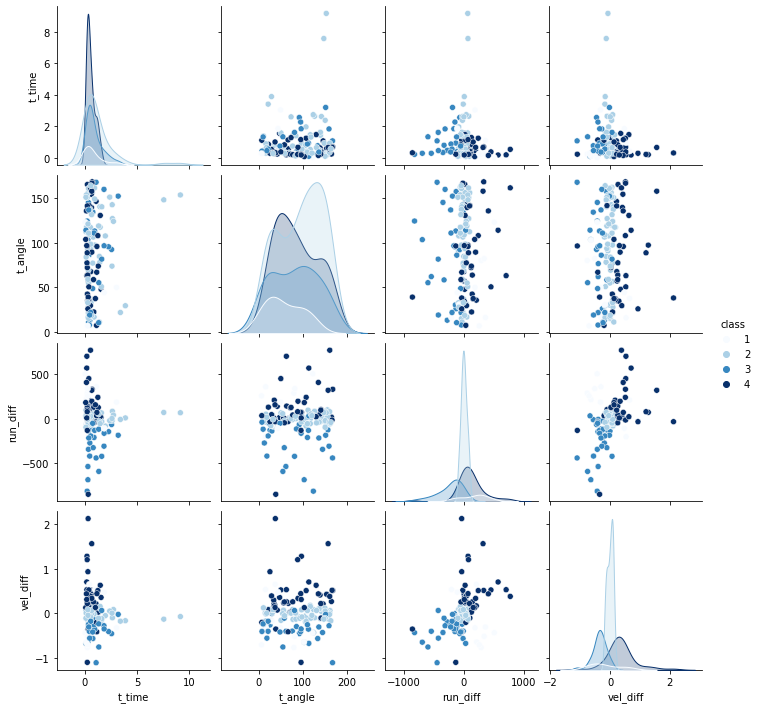

In [106]:
g = sns.pairplot(data,hue='class',palette='Blues')

In [14]:
# g = sns.violinplot(y='class', x ='t_time', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='t_angle', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='run_diff', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='vel_diff', data=data, inner='quartile')
# plt.show()

X = data.drop('class',axis=1)
y = data['class']
print(X.shape)
print(y.shape)

(146, 4)
(146,)


Text(0.5, 1.0, 'Accuracy Scores for Values of k of K-nearest Neighbors')

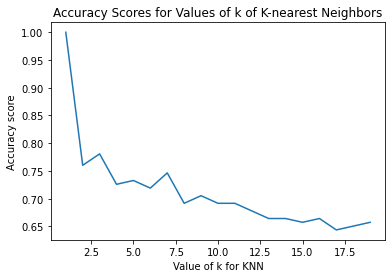

In [15]:
# K-nearest neighbors
k_range = list(range(1,20))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy score')
plt.title('Accuracy Scores for Values of k of K-nearest Neighbors')

In [16]:
logreg= LogisticRegression()
logreg.fit(X,y)
y_predict = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.6575342465753424


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87, 4)
(59, 4)
(87,)
(59,)


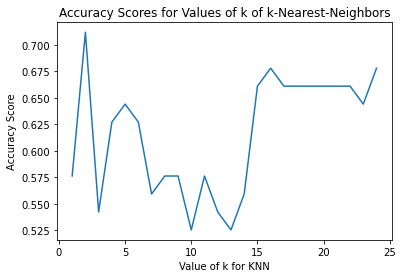

In [18]:
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.576271186440678


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<AxesSubplot:>

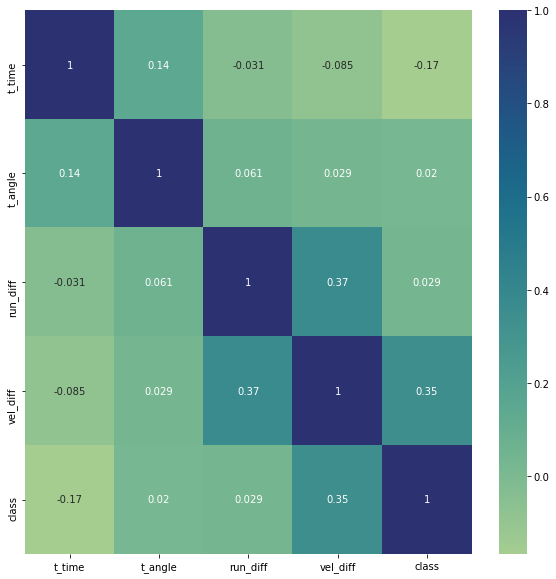

In [99]:
plt.figure(figsize=(10,10))
# sns.heatmap(data.corr(), annot=True,cmap="RdYlGn")
sns.heatmap(data.corr(), annot=True,cmap="crest")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109, 4)
(37, 4)
(109,)
(37,)


In [22]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 1  0  1  1]
 [ 0 15  1  1]
 [ 0  2  3  0]
 [ 0  3  2  7]]


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 74.18 %
Standard Deviation: 13.70 %


In [24]:
X_new = data.drop(['t_time','t_angle','class'],axis=1)
y = data['class']
print(X_new.shape)
print(y.shape)

(146, 2)
(146,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 2)
(44, 2)
(102,)
(44,)


In [32]:
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 2  0  1  0]
 [ 0 20  0  1]
 [ 0  2  4  0]
 [ 0  2  2 10]]


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 74.55 %
Standard Deviation: 8.99 %


In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf =make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))

In [56]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [57]:
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracies = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 2  0  1  0]
 [ 0 21  0  0]
 [ 0  0  6  0]
 [ 0  2  2 10]]
Accuracy: 87.36 %
Standard Deviation: 6.04 %


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


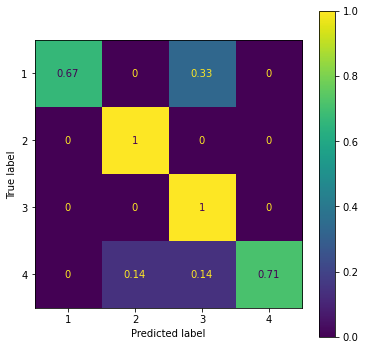

In [65]:
from sklearn.metrics import plot_confusion_matrix

fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(clf, X_test, y_test, normalize='true', ax=ax)

[[ 2  1  0  0]
 [ 0 21  0  0]
 [ 0  0  6  0]
 [ 0  0  2 12]]
Accuracy: 89.27 %
Standard Deviation: 6.80 %


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


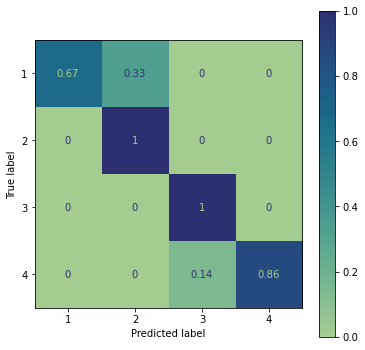

In [97]:
n=7
clf1 =make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracies = cross_val_score(estimator=clf1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(clf1, X_test, y_test, normalize='true', ax=ax, cmap="crest")

In [109]:
print(X.shape)

(146, 4)


In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# X_sel = SelectKBest(chi2, k=2).fit_transform(X,y)
# X_sel.shape

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X_sel = model.transform(X)
X_sel.shape

(146, 2)

In [115]:
X_sel

array([[ 3.7186e+01,  1.5537e+02],
       [ 9.1094e+01, -8.8100e+01],
       [ 1.5637e+02,  9.9360e+01],
       [ 1.5764e+02, -1.2732e+02],
       [ 6.7791e+01,  3.8500e-01],
       [ 1.1806e+02,  3.6862e+01],
       [ 9.2597e+01, -6.6910e+01],
       [ 1.1424e+02,  5.7191e+02],
       [ 6.2158e+01, -5.4174e+02],
       [ 1.1248e+02,  9.5955e+01],
       [ 2.6052e+01, -1.2983e+02],
       [ 1.5465e+02,  6.0640e+00],
       [ 7.6748e+01, -8.5970e+00],
       [ 6.9336e+01, -7.1800e-01],
       [ 1.4672e+02,  3.2185e+01],
       [ 4.7914e+01,  1.4436e+01],
       [ 1.3453e+02, -1.1757e+01],
       [ 1.4287e+02, -2.1907e+01],
       [ 1.4935e+02,  1.7936e+01],
       [ 1.3199e+01, -2.7584e+02],
       [ 3.0365e+01, -1.3981e+02],
       [ 7.8312e+01,  4.0725e+01],
       [ 9.3832e+01,  9.1090e+00],
       [ 1.6240e+02, -5.8633e+01],
       [ 2.9442e+01,  7.9450e+00],
       [ 1.6561e+02,  1.7792e+01],
       [ 1.4069e+02,  4.7890e+00],
       [ 8.4860e+01, -2.7400e-01],
       [ 9.7499e+01,

In [116]:
X

,t_time,t_angle,run_diff,vel_diff
0,0.46,37.186,155.370,0.18187
1,0.30,91.094,-88.100,-0.07524
2,0.70,156.370,99.360,0.01621
3,0.41,157.640,-127.320,-0.11604
4,0.56,67.791,0.385,0.22480
...,...,...,...,...
141,0.21,88.883,78.270,1.20180
142,0.22,96.566,-133.270,-1.09740
143,0.36,137.030,-219.160,-0.30469
144,0.17,96.949,7.720,0.31081


In [117]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sel, y, test_size=0.3, random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(102, 2)
(44, 2)
(102,)
(44,)


[[ 0  1  0  2]
 [ 0 18  0  3]
 [ 0  2  4  0]
 [ 1  5  2  6]]
Accuracy: 56.64 %
Standard Deviation: 12.50 %


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


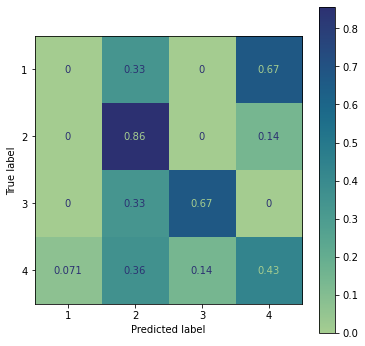

In [118]:
n=7
clf2 =make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
clf2.fit(X_train1, y_train1)
y_pred1=clf2.predict(X_test1)
cm = confusion_matrix(y_test1,y_pred1)
print(cm)
accuracies = cross_val_score(estimator=clf2, X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
fig,ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(clf2, X_test1, y_test1, normalize='true', ax=ax, cmap="crest")

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model1 = LogisticRegression(solver='lbfgs')
rfe = RFE(model1, 2)
fit = rfe.fit(X,y)
print('selected features: %s' % fit.support_)
fit.ranking_

selected features: [ True False False  True]


/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/lee/anaconda3/envs/cell/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TO

array([1, 3, 2, 1])

In [126]:
from sklearn.ensemble import ExtraTreesClassifier
model2 = ExtraTreesClassifier(n_estimators=10)
model2.fit(X,y)
print(model2.feature_importances_)

[0.08464564 0.10712178 0.33312054 0.47511204]
